In [66]:
import os
import gym
import matplotlib.pyplot as plt
import numpy as np
os.environ["SDL_VIDEODRIVER"] = "x11"
from IPython import display

env1 = gym.make("LunarLanderContinuous-v2")#, render_mode="human")
env2 = gym.make("LunarLander-v2")#, render_mode="human")

In [2]:
from env import EnvWrapper
from policy import Policy
from trainer import Trainer
import torch

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
n_epoches = 500

cpu


### discrete case

train reward 2.561 trial steps 180.4 mse value loss 0.009 eval reward 2.798: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [22:06<00:00,  2.65s/it]
train reward 2.909 trial steps 191.3 mse value loss 0.002 eval reward 2.814: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [30:02<00:00,  3.61s/it]
train reward 2.814 trial steps 254.2 mse value loss 0.004 eval reward 2.740: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [32:41<00:00,  3.92s/it]
train reward 1.706 trial steps 595.3 mse value loss 0.004 eval reward 1.765: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [47:34<00:00,  5.71s/

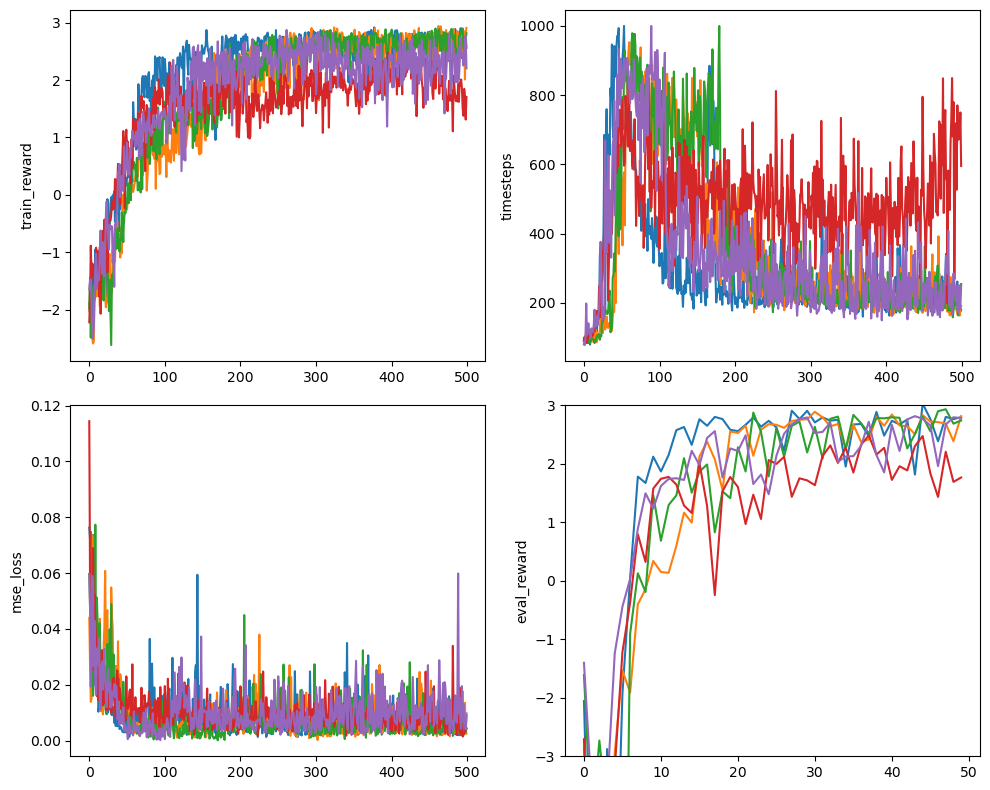

In [4]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
axs = axs.flatten()

for seed in [1,2,3,4,5]:
    
    save_file = f'model_discrete_seed{seed}.pickle'
    
    # set the seeds
    iseed = seed
    np.random.seed(iseed)
    torch.random.manual_seed(iseed)
    env2.seed(iseed)
    
    # this is usually how you run it
    env_discrete = EnvWrapper(env2, reward_scale=0.01)
    policy_discrete = Policy(env_discrete, num_hidden=64)
    trainer = Trainer(env_discrete, policy_discrete, lr=1e-3)
    output_rewards, output_timesteps, output_mse_loss, eval_rewards = \
      trainer.train(save_file, n_epoches=n_epoches, eval_everyepoch=10, eval_n_episodes=5)
    
    # make some plots
    outputs = [output_rewards, output_timesteps, output_mse_loss, eval_rewards]
    ylabels = ['train_reward', 'timesteps', 'mse_loss', 'eval_reward']
    for i, (arr, label) in enumerate(zip(outputs, ylabels)):
        axs[i].plot(arr)
        axs[i].set_ylabel(label)
        if label == 'eval_reward':
            axs[i].set_ylim([-3,3])
        
plt.tight_layout()

### continuous case made discrete

train reward 2.857 trial steps 188.6 mse value loss 0.003 eval reward 2.899: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [41:16<00:00,  4.95s/it]
train reward 2.809 trial steps 205.1 mse value loss 0.004 eval reward 2.358: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [39:29<00:00,  4.74s/it]
train reward 2.778 trial steps 211.3 mse value loss 0.005 eval reward 1.332: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [25:38<00:00,  3.08s/it]
train reward 2.276 trial steps 270.9 mse value loss 0.011 eval reward 2.720: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [45:24<00:00,  5.45s/

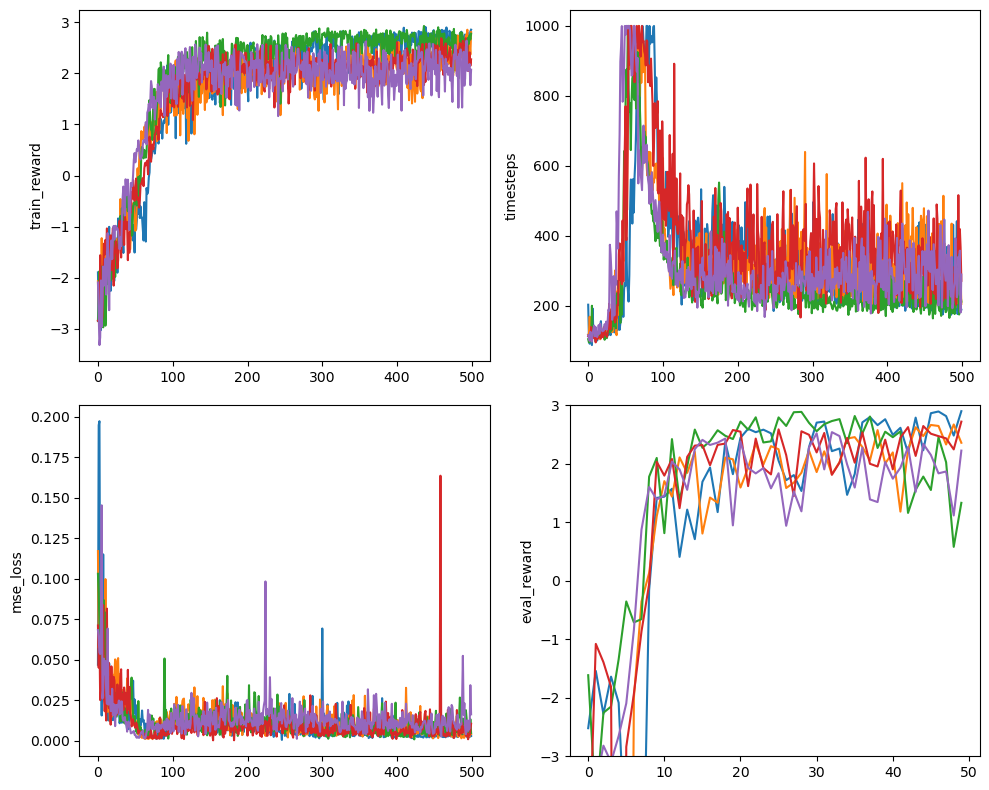

In [5]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
axs = axs.flatten()

for seed in [1,2,3,4,5]:
    
    save_file = f'model_dis_continuous_seed{seed}.pickle'
    
    # set the seeds
    iseed = seed
    np.random.seed(iseed)
    torch.random.manual_seed(iseed)
    env1.seed(iseed)
    
    # this is usually how you run it
    env_dis_continuous = EnvWrapper(env1, make_discrete=10, reward_scale=0.01)
    policy_dis_continuous = Policy(env_dis_continuous, num_hidden=64)
    trainer = Trainer(env_dis_continuous, policy_dis_continuous, lr=1e-3)
    output_rewards, output_timesteps, output_mse_loss, eval_rewards = \
        trainer.train(save_file, n_epoches=n_epoches, eval_everyepoch=10, eval_n_episodes=5)
    
    # make some plots
    outputs = [output_rewards, output_timesteps, output_mse_loss, eval_rewards]
    ylabels = ['train_reward', 'timesteps', 'mse_loss', 'eval_reward']
    for i, (arr, label) in enumerate(zip(outputs, ylabels)):
        axs[i].plot(arr)
        axs[i].set_ylabel(label)
        if label == 'eval_reward':
            axs[i].set_ylim([-3,3])
        
plt.tight_layout()

### continuous case

train reward 1.345 trial steps 509.7 mse value loss 0.012 eval reward 1.544: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [45:48<00:00,  5.50s/it]
train reward 0.945 trial steps 379.2 mse value loss 0.018 eval reward 1.226: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [55:38<00:00,  6.68s/it]
train reward 1.882 trial steps 434.2 mse value loss 0.010 eval reward 2.523: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [47:27<00:00,  5.70s/it]
train reward 2.146 trial steps 409.5 mse value loss 0.007 eval reward 2.189: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [46:20<00:00,  5.56s/

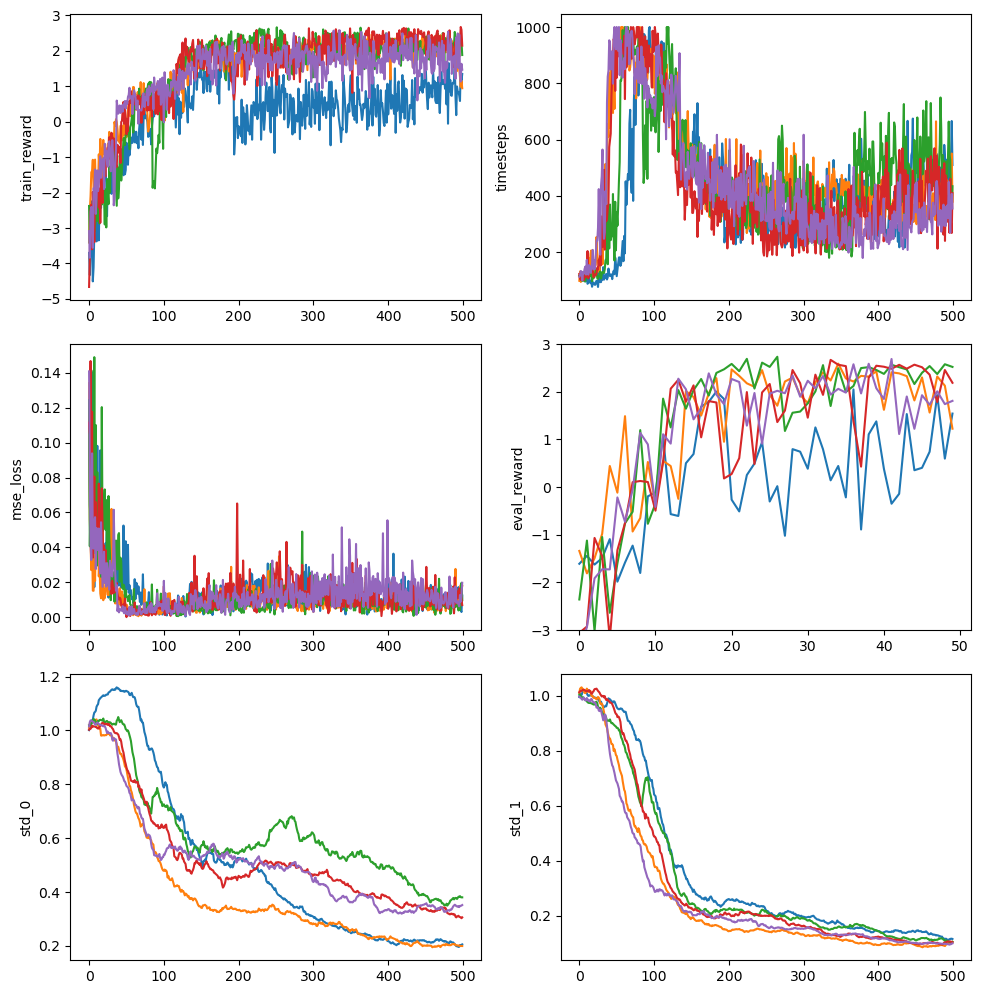

In [6]:
fig, axs = plt.subplots(3,2, figsize=(10,10))
axs = axs.flatten()

for seed in [1,2,3,4,5]:
    
    save_file = f'model_continuous_seed{seed}.pickle'
    
    # set the seeds
    iseed = seed
    np.random.seed(iseed)
    torch.random.manual_seed(iseed)
    env1.seed(iseed)
    
    # this is usually how you run it
    env_continuous = EnvWrapper(env1, reward_scale=0.01)
    policy_continuous = Policy(env_continuous, num_hidden=64, init_logstd=0)
    trainer = Trainer(env_continuous, policy_continuous, lr=1e-3)
    output_rewards, output_timesteps, output_mse_loss, eval_rewards, output_stds = \
        trainer.train(save_file, n_epoches=n_epoches, eval_everyepoch=10, eval_n_episodes=5, keepstd=True)
    
    # make some plots
    outputs = [output_rewards, output_timesteps, output_mse_loss, eval_rewards, output_stds[:,0], output_stds[:,1]]
    ylabels = ['train_reward', 'timesteps', 'mse_loss', 'eval_reward', 'std_0', 'std_1']
    for i, (arr, label) in enumerate(zip(outputs, ylabels)):
        axs[i].plot(arr)
        axs[i].set_ylabel(label)
        if label == 'eval_reward':
            axs[i].set_ylim([-3,3])
        
plt.tight_layout()

### let's generate some gifs

In [60]:
import imageio

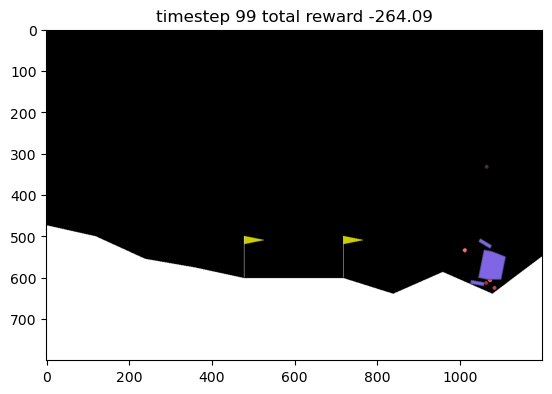

In [59]:
env = gym.make("LunarLander-v2")#, render_mode="human")
env.action_space.seed(42)
env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
total_reward = 0.0

for i in range(1000):
    observation, reward, done, info = env.step(env.action_space.sample())        
#     plt.imshow( env.render(mode='rgb_array') )
#     plt.show()
    total_reward += reward
    plt.title(f"timestep {i} total reward {total_reward:.02f}")
    img.set_data(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    if done: break


env.close()

In [62]:
env = gym.make("LunarLander-v2")#, render_mode="human")
env.action_space.seed(42)
env.reset()
imgs = []
imgs.append(env.render(mode='rgb_array'))

for i in range(1000):
    observation, reward, done, info = env.step(env.action_space.sample())
    if done: break
    imgs.append(env.render(mode='rgb_array'))

env.close()

imageio.mimsave('random.gif', imgs)

In [11]:
env1 = gym.make("LunarLanderContinuous-v2")#, render_mode="human")
env2 = gym.make("LunarLander-v2")#, render_mode="human")

In [78]:
from env import EnvWrapper

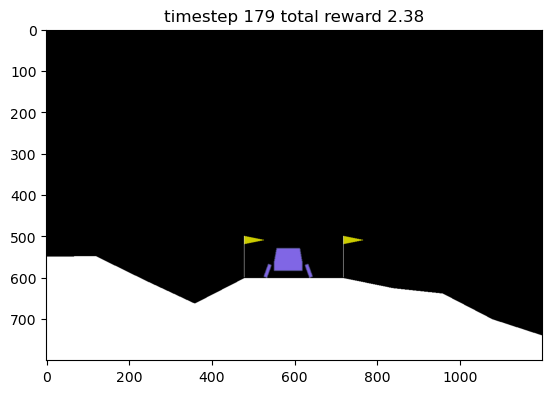

In [80]:
env = EnvWrapper(env2)
policy = Policy(env, num_hidden=64)
policy.load_state_dict(torch.load('model_discrete_seed1.pickle'))

state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
total_reward = 0.0

for i in range(1000):
    dist, _ = policy(torch.tensor(state).reshape(1,-1).float())
    action = dist.mode
    action = action.cpu().numpy()[0]
    state, reward, done, info = env.step(action)
    total_reward += reward
    plt.title(f"timestep {i} total reward {total_reward:.02f}")
#     plt.imshow(env.render(mode='rgb_array') )
#     plt.show()
    img.set_data(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    if done: break

In [82]:
env = EnvWrapper(env2)
policy = Policy(env, num_hidden=64)
policy.load_state_dict(torch.load('model_discrete_seed1.pickle'))

state = env.reset()
imgs = [env.render(mode='rgb_array')]

for i in range(1000):
    dist, _ = policy(torch.tensor(state).reshape(1,-1).float())
    action = dist.mode
    action = action.cpu().numpy()[0]
    state, reward, done, info = env.step(action)
    imgs.append(env.render(mode='rgb_array'))    
    if done: break
imageio.mimsave('discrete.gif', imgs)

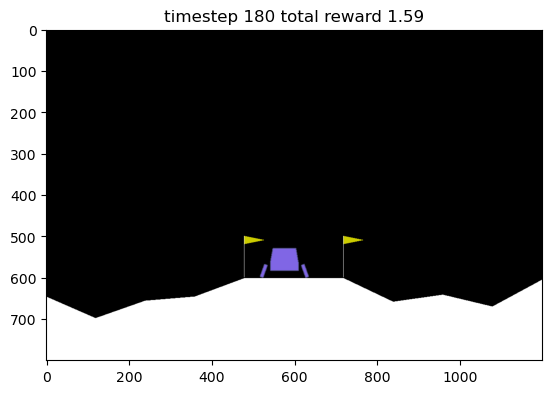

In [54]:
env = EnvWrapper(env1, reward_scale=0.01, make_discrete=10)
policy = Policy(env, num_hidden=64)
policy.load_state_dict(torch.load('model_dis_continuous_seed1.pickle'))

state = env.reset()
img = plt.imshow(env.env.render(mode='rgb_array'))
total_reward = 0.0
for i in range(1000):
    dist, _ = policy(torch.tensor(state).reshape(1,-1).float())
    action = dist.mode
    action = action.cpu().numpy()[0]
    state, reward, done, _ = env.step(action)
    total_reward += reward
    if done: break
    plt.imshow(env.env.render(mode='rgb_array'))
    plt.title(f"timestep {i} total reward {total_reward:.02f}")
    plt.show()
    display.clear_output(wait=True)

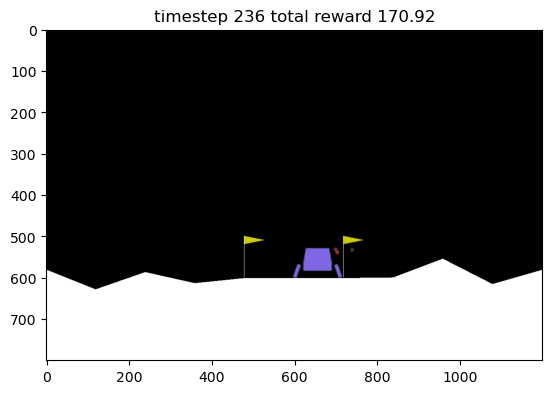

In [51]:
env = EnvWrapper(env1)
policy = Policy(env, num_hidden=64)
policy.load_state_dict(torch.load('model_continuous_seed4.pickle'))

state = env.reset()
img = plt.imshow(env.env.render(mode='rgb_array'))
total_reward = 0.0
for i in range(1000):
    dist, _ = policy(torch.tensor(state).reshape(1,-1).float())
    action = dist.mode
    action = action.detach().cpu().numpy()[0]
    state, reward, done, _ = env.step(action)
    total_reward += reward
    if done: break
    plt.imshow(env.env.render(mode='rgb_array'))
    plt.title(f"timestep {i} total reward {total_reward:.02f}")
    plt.show()
    display.clear_output(wait=True)